### Importação dos dados



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

faturamento_lojas = todas_lojas.groupby("Loja")["Preço"].sum().sort_values(ascending=False)

print("Faturamento por loja:\n")
print(faturamento_lojas)

Faturamento por loja:

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


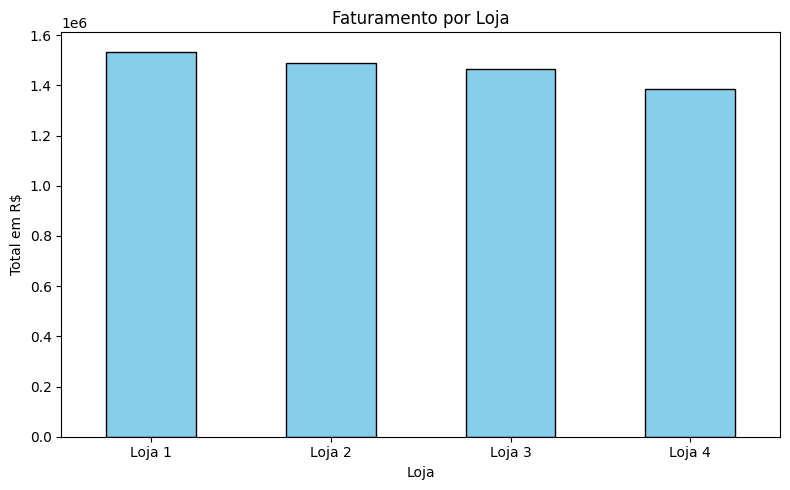

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
faturamento_lojas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Total em R$")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


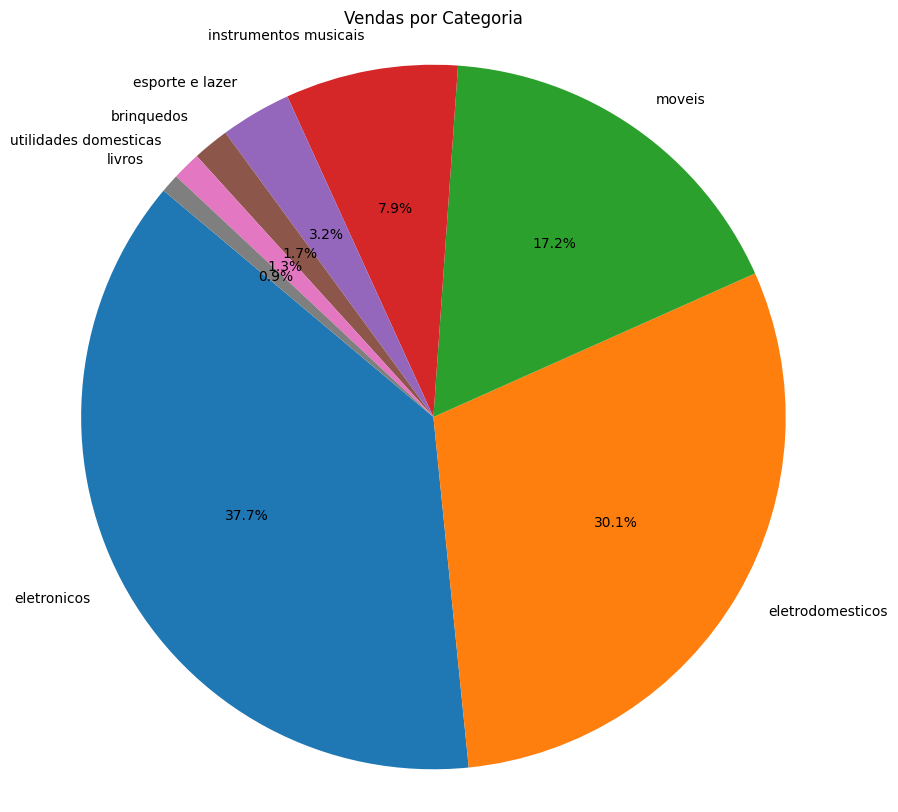

In [ ]:
# prompt: cria uma estrutura analizando as vendas por categoria e monta um grafico de pizza

# Concatenate the individual store dataframes into a single dataframe
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

vendas_por_categoria = lojas.groupby('Categoria do Produto')["Preço"].sum().sort_values(ascending=False)

# Criar o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Vendas por Categoria')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Salvar o gráfico
plt.savefig("vendas_por_categoria.png")

# Opcional: exibir o gráfico
# plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# Criando lista com os DataFrames e outra com os nomes
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Usando estrutura de repetição + dicionário para calcular a média
avaliacoes = {}
for i in range(len(lojas)):
    media = lojas[i]['Avaliação da compra'].mean()
    avaliacoes[nomes[i]] = round(media, 2)

# Transformando o dicionário em DataFrame
avaliacoes_df = pd.DataFrame.from_dict(avaliacoes, orient='index', columns=['Média de Avaliação'])
print(avaliacoes_df)

        Média de Avaliação
Loja 1                3.98
Loja 2                4.04
Loja 3                4.05
Loja 4                4.00


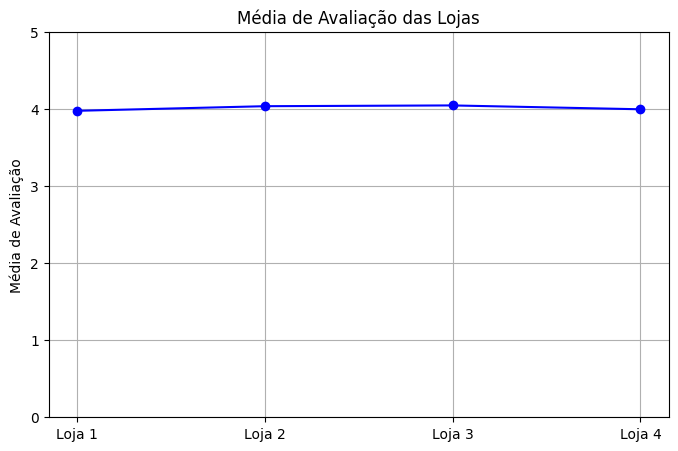

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(
    avaliacoes_df.index,                     # eixo X: nomes das lojas (índice do DataFrame)
    avaliacoes_df['Média de Avaliação'],    # eixo Y: média de avaliação
    marker='o',
    linestyle='-',
    color='blue'
)

plt.title('Média de Avaliação das Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)  # fixar escala do gráfico de 0 a 5
plt.grid(True)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [ ]:
vendas_produtos = dados['Produto'].value_counts()
print("Produtos mais vendidos:")
print(vendas_produtos.head(10))
print("\nProdutos menos vendidos:")
print(vendas_produtos.tail(10))

Produtos mais vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

Produtos menos vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


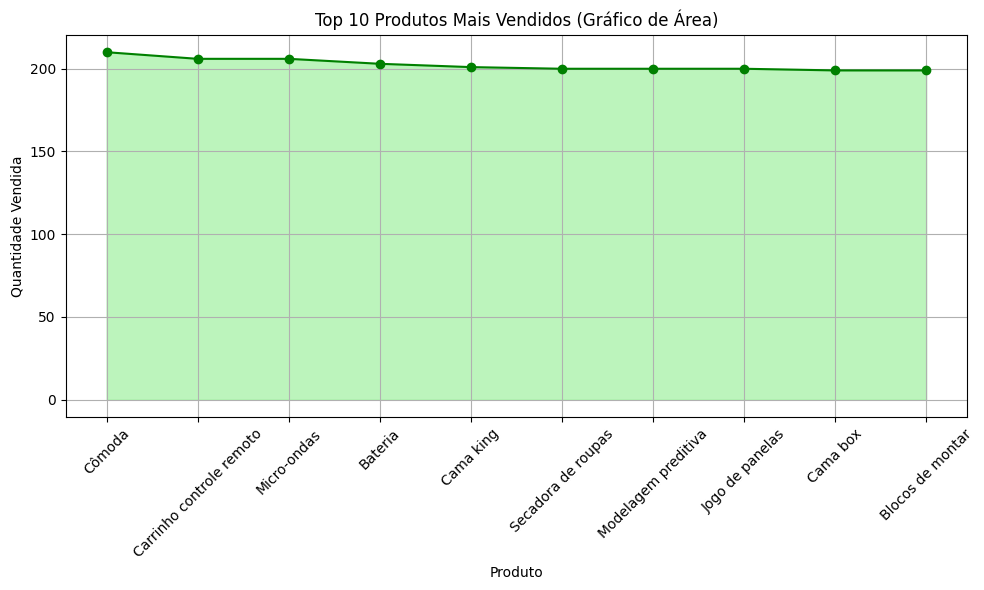

In [ ]:
import matplotlib.pyplot as plt

dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
vendas_produtos = dados['Produto'].value_counts()

top_vendidos = vendas_produtos.head(10)

plt.figure(figsize=(10, 6))
plt.fill_between(range(len(top_vendidos)), top_vendidos.values, color='lightgreen', alpha=0.6)
plt.plot(range(len(top_vendidos)), top_vendidos.values, marker='o', color='green')
plt.xticks(range(len(top_vendidos)), top_vendidos.index, rotation=45)
plt.title('Top 10 Produtos Mais Vendidos (Gráfico de Área)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()

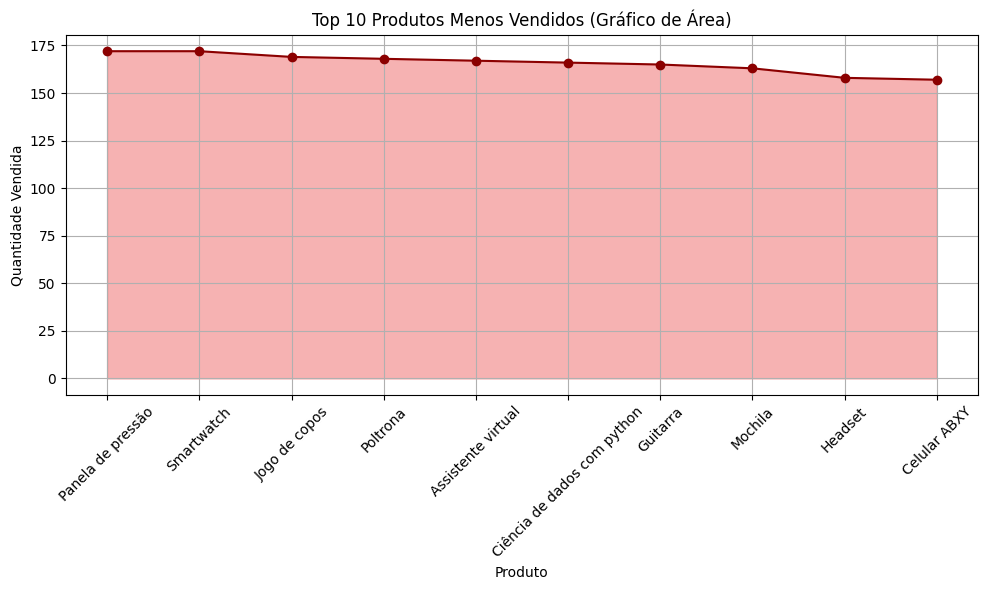

In [ ]:
menos_vendidos = vendas_produtos.tail(10)

plt.figure(figsize=(10, 6))
plt.fill_between(range(len(menos_vendidos)), menos_vendidos.values, color='lightcoral', alpha=0.6)
plt.plot(range(len(menos_vendidos)), menos_vendidos.values, marker='o', color='darkred')
plt.xticks(range(len(menos_vendidos)), menos_vendidos.index, rotation=45)
plt.title('Top 10 Produtos Menos Vendidos (Gráfico de Área)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_por_loja = {}

for nome_loja in nomes_lojas:
    soma_fretes = 0
    contador = 0
    for i in range(len(todas_lojas)):
        if todas_lojas.iloc[i]['Loja'] == nome_loja:
            soma_fretes += todas_lojas.iloc[i]['Frete']
            contador += 1
    if contador > 0:
        media = round(soma_fretes / contador, 2)
    else:
        media = 0
    fretes_por_loja[nome_loja] = media

print("Frete médio por loja:\n")
for loja in fretes_por_loja:
    print(f"{loja}: R${fretes_por_loja[loja]}")

Frete médio por loja:

Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


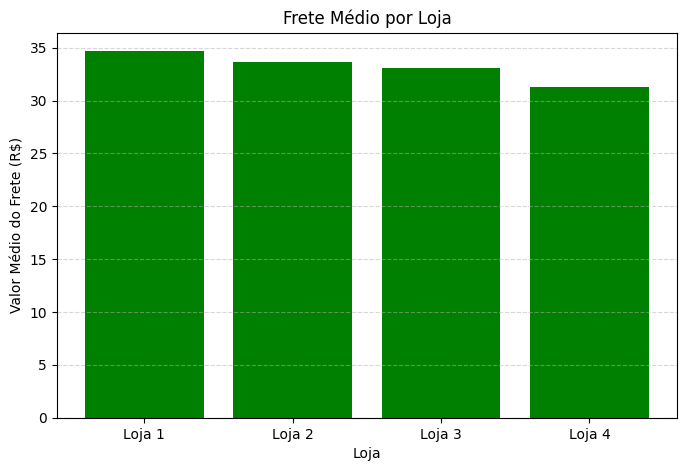

In [ ]:
import matplotlib.pyplot as plt

nomes = []
valores = []

for loja in fretes_por_loja:
    nomes.append(loja)
    valores.append(fretes_por_loja[loja])

plt.figure(figsize=(8, 5))
plt.bar(nomes, valores, color='green')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Relatório


## Objetivo

Este relatório tem como objetivo analisar o desempenho das quatro lojas sob responsabilidade do Sr. João, a fim de identificar *qual loja apresenta o menor desempenho* e pode ser considerada para *venda*, possibilitando investimentos em um novo negócio.

---

## 🔍 Métricas Analisadas

### 1. *Faturamento Total*

| Loja     | Faturamento (R$)   |
|----------|--------------------|
| Loja 1   | 1.534.509,12       |
| Loja 2   | 1.484.895,86       |
| Loja 3   | 1.456.202,85       |
| Loja 4   | 1.451.899,58       |

- ✅ *Maior faturamento:* Loja 1  
- 🔻 *Menor faturamento:* Loja 4

---

### 2. *Frete Médio*

| Loja     | Frete Médio (R$)   |
|----------|--------------------|
| Loja 1   | 34,60              |
| Loja 2   | 33,62              |
| Loja 3   | 33,07              |
| Loja 4   | 31,28              |

- ✅ *Frete mais barato:* Loja 4  
- 🔺 *Frete mais caro:* Loja 1

---

### 3. *Média de Avaliação dos Clientes*

| Loja     | Avaliação Média    |
|----------|--------------------|
| Loja 1   | 3,98               |
| Loja 2   | 4,04               |
| Loja 3   | 4,05               |
| Loja 4   | 4,00               |

- ✅ *Melhor avaliada:* Loja 3  
- 🔻 *Pior avaliada:* Loja 1

---

### 4. *Produtos Mais Vendidos*

Os produtos mais vendidos foram semelhantes entre as lojas, destacando itens como:

- Cômoda
- Carrinho de controle remoto
- Micro-ondas

Não houve concentração exclusiva de produtos populares em uma loja específica.

---

### 5. *Produtos Menos Vendidos*

Observa-se que a *Loja 4* apresentou um número ligeiramente maior de produtos com baixo giro, como:

- Celular ABXY
- Headset
- Mochila

---

## ✅ Conclusão e Recomendação

Com base nos dados analisados, a loja com *menor desempenho geral* é a *Loja 4*, pois:

- Apresenta o *menor faturamento*
- Tem *avaliação de clientes abaixo da média*
- Concentra mais produtos com baixa saída

Apesar de ter o frete mais barato, isso não compensa os demais indicadores negativos.

*Recomendação final:*  
➡️ *Vender a Loja 4* e direcionar os recursos para um novo negócio mais promissor.

---